In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Installing the required Libraries
!pip install torch torchvision torchaudio
!pip install easyocr
!pip install easyocr opencv-python-headless matplotlib ipywidgets


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [5]:
#Importing the neccessaary libraries
import easyocr
import cv2
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact
from IPython.display import display, Image, Javascript
import io
import re
from google.colab import output
from base64 import b64decode

#**Web Scraping for more data**
#Checking the Drugs.com site for more drugs

In [71]:
import requests
from bs4 import BeautifulSoup
import csv
import time
import string

# Function to generate URLs for double letters
def generate_urls():
    urls = []
    base_url = "https://www.drugs.com/alpha/"

    # Double letters
    for first in string.ascii_lowercase:
        for second in string.ascii_lowercase:
            urls.append(f"{base_url}{first}{second}.html")

    return urls

def fetch_content(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        return soup
    else:
        print(f"Failed to scrape {url}")
        return None

def extract_drug_names_and_links(soup):
    if soup:
        drugs = []
        for a in soup.find_all('a', href=True):
            if a.get_text() and '/alpha/' not in a['href']:
                drug_name = a.get_text().strip()
                drug_link = a['href']
                drugs.append((drug_name, "https://www.drugs.com" + drug_link))
        return drugs
    return []

def save_to_csv(data, filename='drugs.csv'):
    with open(filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['Drug Name', 'Link'])
        writer.writerows(data)

def main():
    all_drugs = []
    double_letter_urls = generate_urls()

    for url in double_letter_urls:
        print(f"Fetching content from {url}")
        soup = fetch_content(url)

        if soup:
            drugs = extract_drug_names_and_links(soup)
            all_drugs.extend(drugs)

            time.sleep(1)  # Adding a delay to avoid overwhelming the server

    save_to_csv(all_drugs)
    print("Data saved to drugs.csv")

if __name__ == "__main__":
    main()


Fetching content from https://www.drugs.com/alpha/aa.html
Fetching content from https://www.drugs.com/alpha/ab.html
Fetching content from https://www.drugs.com/alpha/ac.html
Fetching content from https://www.drugs.com/alpha/ad.html
Fetching content from https://www.drugs.com/alpha/ae.html
Fetching content from https://www.drugs.com/alpha/af.html
Fetching content from https://www.drugs.com/alpha/ag.html
Fetching content from https://www.drugs.com/alpha/ah.html
Fetching content from https://www.drugs.com/alpha/ai.html
Fetching content from https://www.drugs.com/alpha/aj.html
Fetching content from https://www.drugs.com/alpha/ak.html
Fetching content from https://www.drugs.com/alpha/al.html
Fetching content from https://www.drugs.com/alpha/am.html
Fetching content from https://www.drugs.com/alpha/an.html
Fetching content from https://www.drugs.com/alpha/ao.html
Fetching content from https://www.drugs.com/alpha/ap.html
Fetching content from https://www.drugs.com/alpha/aq.html
Fetching conte

In [72]:
#Downloading the csv file generated
from google.colab import files
files.download('drugs.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Cleaning the Scraped data

In [73]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drugs.csv')

# List of irrelevant information
irrelevant_info = [
    "Browse all medications",
    "Download the Medication Guide app on iTunes",
    "Download the Medication Guide app on the Google Play store",
    "Drugs.com",
    "About Drugs.com",
    "Advertising policy",
    "Attribution & citations",
    "Terms of use",
    "Editorial policy",
    "Privacy policy",
    "Help center",
    "Sitemap",
    "Contact us",
    "Subscribe to Drugs.com newsletters",
    "Follow Drugs.com on Facebook",
    "Follow Drugs.com on Twitter",
    "Follow Drugs.com on Instagram",
    "Follow Drugs.com on YouTube",
    "Follow Drugs.com on Pinterest",
    "Subscribe to our newsletter",
    "Skip to main content",
    "Advanced Search",
    "Register",
    "Sign In",
    "Account",
    "Sign in",
    "Create an account",
    "Drugs A-Z",
    "Pill Identifier",
    "Interaction Checker",
    "News & Alerts",
    "Pro Edition",
    "More Resources",
    "Home",
    "Drugs A to Z"
]

# Filter out rows where the drug name is in the irrelevant_info list or empty
df_cleaned = df[~df['Drug Name'].isin(irrelevant_info) & df['Drug Name'].str.strip().astype(bool)]

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('cleaned_file.csv', index=False)


In [74]:
df_cleaned.head()

,Drug Name,Link
1,NaN,https://www.drugs.com//www.drugs.com/
16,Abilify,https://www.drugs.com/abilify.html
17,Abilify Asimtufii,https://www.drugs.com/abilify-asimtufii.html
18,Abilify Maintena,https://www.drugs.com/abilify-maintena.html
19,Abiraterone,https://www.drugs.com/abiraterone.html


In [75]:
df_cleaned = df_cleaned.dropna(subset=['Drug Name'])
df_cleaned.head()

,Drug Name,Link
16,Abilify,https://www.drugs.com/abilify.html
17,Abilify Asimtufii,https://www.drugs.com/abilify-asimtufii.html
18,Abilify Maintena,https://www.drugs.com/abilify-maintena.html
19,Abiraterone,https://www.drugs.com/abiraterone.html
20,Acetaminophen,https://www.drugs.com/acetaminophen.html


In [77]:
def preprocess_file(input_file, output_file):
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        for line in infile:
            fields = line.strip().split('\t')
            if len(fields) == 8:
                outfile.write(line + '\n')

input_file = '/content/Products.txt'
output_file = '/content/Products_clean.txt'
preprocess_file(input_file, output_file)

#**Add a new column(Link) into the dataset we will be using**

In [78]:
import pandas as pd

# Read the preprocessed file
data = pd.read_csv(output_file, sep='\t', header=None)

# Assign column names
data.columns = [
    "ApplNo", "ProductNo", "Form", "Strength",
    "ReferenceDrug", "DrugName", "ActiveIngredient", "ReferenceStandard"
]

#Dropping the first row
data = data.drop(0)

# Display the first few rows of the dataframe to verify
data.head()


,ApplNo,ProductNo,Form,Strength,ReferenceDrug,DrugName,ActiveIngredient,ReferenceStandard
1,000004,004,SOLUTION/DROPS;OPHTHALMIC,1%,0,PAREDRINE,HYDROXYAMPHETAMINE HYDROBROMIDE,0
2,000159,001,TABLET;ORAL,500MG,0,SULFAPYRIDINE,SULFAPYRIDINE,0
3,000552,001,INJECTABLE;INJECTION,"20,000 UNITS/ML",0,LIQUAEMIN SODIUM,HEPARIN SODIUM,0
4,000552,002,INJECTABLE;INJECTION,"40,000 UNITS/ML",0,LIQUAEMIN SODIUM,HEPARIN SODIUM,0
5,000552,003,INJECTABLE;INJECTION,"5,000 UNITS/ML",0,LIQUAEMIN SODIUM,HEPARIN SODIUM,0


In [83]:
import pandas as pd

data['DrugName'] = data['DrugName'].str.lower()
# Use the new column name 'DrugName' instead of 'Drug Name'
df_cleaned['DrugName'] = df_cleaned['Drug Name'].str.lower()

# Rename the column in df_cleaned to match 'DrugName' in data
# This line is no longer necessary as we are using the correct column name above
# df_cleaned = df_cleaned.rename(columns={'Drug Name': 'DrugName'})

# Create a dictionary from the second DataFrame for fast lookup
drug_link_dict = pd.Series(df_cleaned.Link.values, index=df_cleaned.DrugName).to_dict()

# Initialize a new column for links in the first DataFrame
# No syntax errors to fix here.
data['DrugLink'] = data['DrugName'].apply(lambda x: drug_link_dict.get(x, 'link not found'))

# Display the updated DataFrame for verification
print("\nUpdated DataFrame:")
data.head()

# Save the updated DataFrame to a new CSV file
data.to_csv('updated_file.csv', index=False)

print("Updated file saved as 'updated_file.csv'")



Updated DataFrame:
Updated file saved as 'updated_file.csv'


#**Text extraction from image using EasyOCR**

In [32]:

# Function to extract text from the composition section of the drug
def extract_text(image_path):
    """Extracts text from an image using EasyOCR."""
    reader = easyocr.Reader(['en'])  # Specify the language(s) you want to use
    result = reader.readtext(image_path)

    # Display the image with bounding boxes around detected text
    image = cv2.imread(image_path)
    full_text = ""  # Initialize an empty string to hold the full text
    for detection in result:
        top_left = tuple(int(coord) for coord in detection[0][0])  # Convert coordinates to integers
        bottom_right = tuple(int(coord) for coord in detection[0][2])  # Convert coordinates to integers
        text = detection[1]
        full_text += text + " "  # Append the detected text to the full_text string
        font = cv2.FONT_HERSHEY_SIMPLEX
        image = cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 3)
        image = cv2.putText(image, text, top_left, font, 0.5, (255, 0, 0), 2, cv2.LINE_AA)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    print("Extracted Text in Original Form:\n")
    print(full_text.strip())  # Print the full text with leading/trailing whitespace removed

    return result, full_text.strip()


#Splitting the extracted text and cleaning it

In [41]:
import re

# Function to clean and split the information from the composition section on drug
def clean_and_split_list(input_list):
    # Defining a regular expression pattern to match delimiters and numbers
    pattern = r'[\W_]+'  # Match any non-word character or underscore

    # Initializing an empty list to store the cleaned words
    cleaned_list = [] # Initialize cleaned_list inside the function

    # Iterating through each word in the original list
    for word in input_list:
        # Split the word by the defined pattern and extend the cleaned_list with the results
        parts = re.split(pattern, word)
        cleaned_list.extend(parts)

    # Removing any empty strings from the cleaned_list (if any)
    cleaned_list = [w for w in cleaned_list if w]

    return cleaned_list

#Create a function to ensure uploading of image

interactive(children=(Dropdown(description='Choose:', options=('Upload', 'Capture'), value=None), Output()), _…

[]


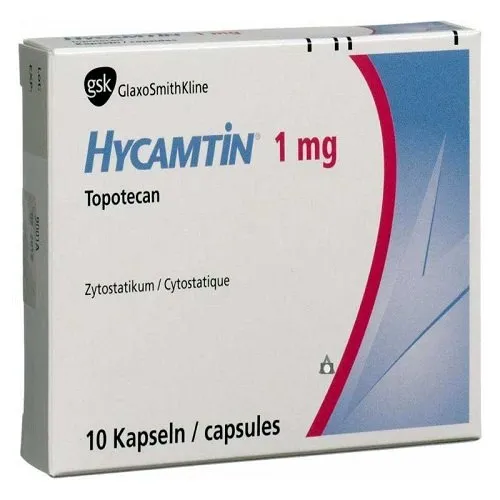

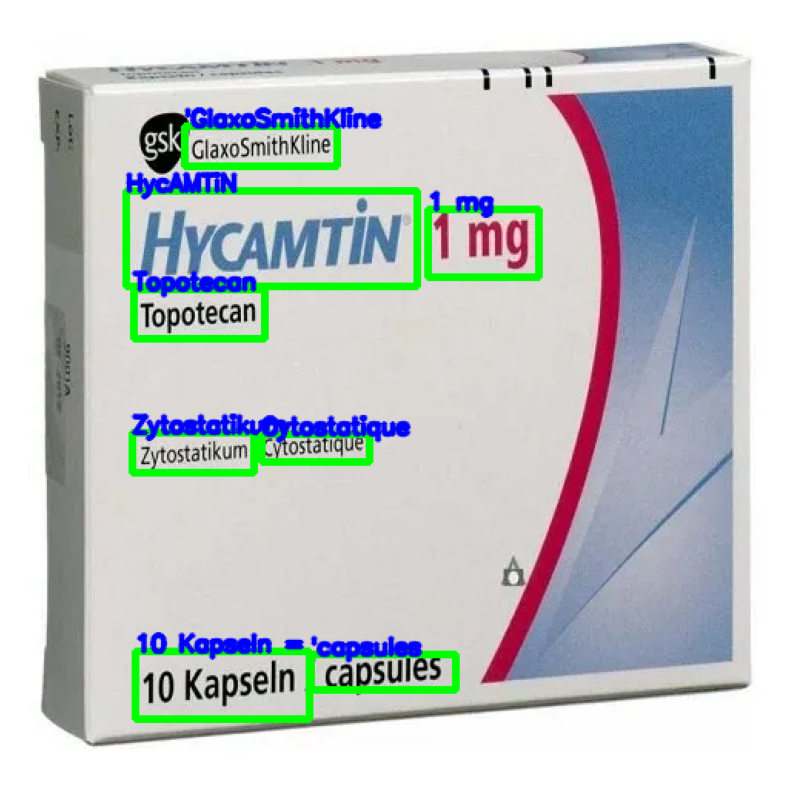

Extracted Text in Original Form:

'GlaxoSmithKline HycAMTiN 1 mg Topotecan Zytostatikum Cytostatique 10 Kapseln = 'capsules
[([[113, 75], [212, 75], [212, 101], [113, 101]], "'GlaxoSmithKline", 0.7451748370541769), ([[75, 117], [264, 117], [264, 179], [75, 179]], 'HycAMTiN', 0.6035908471661221), ([[271, 129], [343, 129], [343, 173], [271, 173]], '1 mg', 0.953860342502594), ([[80, 181], [165, 181], [165, 213], [80, 213]], 'Topotecan', 0.9997266344160232), ([[79, 274], [158, 274], [158, 300], [79, 300]], 'Zytostatikum', 0.9981710105707884), ([[163, 275], [233, 275], [233, 293], [163, 293]], 'Cytostatique', 0.8143595168211583), ([[81, 416], [194, 416], [194, 460], [81, 460]], '10 Kapseln =', 0.7138672292477116), ([[195.88000423998727, 418.60800678397965], [285.53188386314383, 407.1222895917463], [289.1199957600127, 441.39199321602035], [199.46811613685617, 452.8777104082537]], "'capsules", 0.5943683767150557)]
Full Text List: ["'GlaxoSmithKline", 'HycAMTiN', '1', 'mg', 'Topotecan', 'Zytos

In [45]:

result_list = [] # Initializing result_list in global scope

# Method to take an uploaded picture from the user
def on_upload_change(change):
    global result_list # Declaring result_list as global
    uploaded_file = change['new']
    if uploaded_file:
        for file_name, file_info in uploaded_file.items():
            img_data = file_info['content']
            img = Image(img_data)
            with open('uploaded_image.jpg', 'wb') as f:
                f.write(img_data)
            display(img)
            result, full_text = extract_text('uploaded_image.jpg')  # Storing the returned values
            print(result)

            # Process the full_text
            full_text_list = full_text.strip().split()
            print("Full Text List:", full_text_list)
            cleaned_list = clean_and_split_list(full_text_list)  # Cleaning and splitting the text
            cleaned_list = [word.lower() for word in cleaned_list]  # Applying .lower() to each word individually
            print("Cleaned List:", cleaned_list)
            result_list = cleaned_list # Assigning cleaned_list to result_list

# Method to provide the user with a choice whether to upload or capture the image
def user_choice(choice):
    if choice == 'Upload':
        upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
        upload_widget.observe(on_upload_change, names='value')
        display(upload_widget)
    elif choice == 'Capture':
        capture_image()

# Creating a dropdown menu for the user to choose between upload and capture
choice_widget = widgets.Dropdown(
    options=['Upload', 'Capture'],
    value=None,
    description='Choose:',
    disabled=False,
)

interact(user_choice, choice=choice_widget)

# Now you can access result_list outside of the function
print(result_list) # This will print an empty list until an image is uploaded and processed.

#Creating a format to ensure a double layer comparison

In [46]:
result_list

['glaxosmithkline',
 'hycamtin',
 '1',
 'mg',
 'topotecan',
 'zytostatikum',
 'cytostatique',
 '10',
 'kapseln',
 'capsules']

In [47]:
def form_nested_list(words):
    units = ['mg', 'mL', 'units']
    nested_list = []
    unit_combinations = []

    # Iterating through the list to find units and combine them with the preceding word
    for i in range(len(words)):
        if words[i] in units:
            if i > 0:
                unit_combinations.append(words[i - 1] + words[i])

    # Creating the nested list with each word and the unit combination
    for word in words:
        if word not in units:
            for unit in unit_combinations:
                nested_list.append([word, unit])
        else:
            for unit in unit_combinations:
                if unit != word:
                    nested_list.append([word, unit])

    return nested_list

# Example usage
words = result_list

# Forming the nested list
nested_list = form_nested_list(words)

print("Nested List:", nested_list)


Nested List: [['glaxosmithkline', '1mg'], ['hycamtin', '1mg'], ['1', '1mg'], ['mg', '1mg'], ['topotecan', '1mg'], ['zytostatikum', '1mg'], ['cytostatique', '1mg'], ['10', '1mg'], ['kapseln', '1mg'], ['capsules', '1mg']]


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
medicine_data = pd.read_csv("/content/updated_file.csv")
medicine_data.head()

,ApplNo,ProductNo,Form,Strength,ReferenceDrug,DrugName,ActiveIngredient,ReferenceStandard,DrugLink
0,4,4,SOLUTION/DROPS;OPHTHALMIC,1%,0,paredrine,HYDROXYAMPHETAMINE HYDROBROMIDE,0,link not found
1,159,1,TABLET;ORAL,500MG,0,sulfapyridine,SULFAPYRIDINE,0,https://www.drugs.com/cons/sulfapyridine.html
2,552,1,INJECTABLE;INJECTION,"20,000 UNITS/ML",0,liquaemin sodium,HEPARIN SODIUM,0,link not found
3,552,2,INJECTABLE;INJECTION,"40,000 UNITS/ML",0,liquaemin sodium,HEPARIN SODIUM,0,link not found
4,552,3,INJECTABLE;INJECTION,"5,000 UNITS/ML",0,liquaemin sodium,HEPARIN SODIUM,0,link not found


#**DATA PREPROCESSING**


In [51]:
medicine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46632 entries, 0 to 46631
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ApplNo             46632 non-null  int64 
 1   ProductNo          46632 non-null  int64 
 2   Form               46632 non-null  object
 3   Strength           46536 non-null  object
 4   ReferenceDrug      46632 non-null  int64 
 5   DrugName           46632 non-null  object
 6   ActiveIngredient   46632 non-null  object
 7   ReferenceStandard  46632 non-null  int64 
 8   DrugLink           46632 non-null  object
dtypes: int64(4), object(5)
memory usage: 3.2+ MB


In [52]:
numeric_data=medicine_data.select_dtypes(include=np.number)
non_numeric=medicine_data.select_dtypes(include = ['object'])

In [53]:
numeric_data.head()

,ApplNo,ProductNo,ReferenceDrug,ReferenceStandard
0,4,4,0,0
1,159,1,0,0
2,552,1,0,0
3,552,2,0,0
4,552,3,0,0


In [54]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
numeric_data = pd.DataFrame(np.round(imp.fit_transform(numeric_data)), columns=numeric_data.copy().columns)
numeric_data.head()

,ApplNo,ProductNo,ReferenceDrug,ReferenceStandard
0,4.0,4.0,0.0,0.0
1,159.0,1.0,0.0,0.0
2,552.0,1.0,0.0,0.0
3,552.0,2.0,0.0,0.0
4,552.0,3.0,0.0,0.0


In [55]:
non_numeric.head()

,Form,Strength,DrugName,ActiveIngredient,DrugLink
0,SOLUTION/DROPS;OPHTHALMIC,1%,paredrine,HYDROXYAMPHETAMINE HYDROBROMIDE,link not found
1,TABLET;ORAL,500MG,sulfapyridine,SULFAPYRIDINE,https://www.drugs.com/cons/sulfapyridine.html
2,INJECTABLE;INJECTION,"20,000 UNITS/ML",liquaemin sodium,HEPARIN SODIUM,link not found
3,INJECTABLE;INJECTION,"40,000 UNITS/ML",liquaemin sodium,HEPARIN SODIUM,link not found
4,INJECTABLE;INJECTION,"5,000 UNITS/ML",liquaemin sodium,HEPARIN SODIUM,link not found


In [56]:
for col in non_numeric:
    most_frequent_value = non_numeric[col].mode()[0]
    non_numeric[col].fillna(most_frequent_value, inplace=True)


non_numeric.head()

,Form,Strength,DrugName,ActiveIngredient,DrugLink
0,SOLUTION/DROPS;OPHTHALMIC,1%,paredrine,HYDROXYAMPHETAMINE HYDROBROMIDE,link not found
1,TABLET;ORAL,500MG,sulfapyridine,SULFAPYRIDINE,https://www.drugs.com/cons/sulfapyridine.html
2,INJECTABLE;INJECTION,"20,000 UNITS/ML",liquaemin sodium,HEPARIN SODIUM,link not found
3,INJECTABLE;INJECTION,"40,000 UNITS/ML",liquaemin sodium,HEPARIN SODIUM,link not found
4,INJECTABLE;INJECTION,"5,000 UNITS/ML",liquaemin sodium,HEPARIN SODIUM,link not found


In [57]:
non_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46632 entries, 0 to 46631
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Form              46632 non-null  object
 1   Strength          46632 non-null  object
 2   DrugName          46632 non-null  object
 3   ActiveIngredient  46632 non-null  object
 4   DrugLink          46632 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB


In [58]:
medicine_data=pd.concat([numeric_data,non_numeric],axis=1)
medicine_data.tail()

,ApplNo,ProductNo,ReferenceDrug,ReferenceStandard,Form,Strength,DrugName,ActiveIngredient,DrugLink
46627,761373.0,1.0,0.0,0.0,INJECTABLE;INJECTION,45MG/0.5ML,pyzchiva,USTEKINUMAB-TTWE,https://www.drugs.com/pyzchiva.html
46628,761373.0,2.0,0.0,0.0,INJECTABLE;INJECTION,90MG/ML,pyzchiva,USTEKINUMAB-TTWE,https://www.drugs.com/pyzchiva.html
46629,761378.0,1.0,0.0,0.0,INJECTABLE;INJECTION,2MG(0.05ML OF 40MG/ML),ahzantive,AFLIBERCEPT-MRBB,https://www.drugs.com/ahzantive.html
46630,761388.0,1.0,0.0,0.0,INJECTABLE;INTRAVENOUS,340MG/2ML(170MG/ML),piasky,CROVALIMAB-AKKZ,https://www.drugs.com/piasky.html
46631,761425.0,1.0,0.0,0.0,INJECTABLE;SUBCUTANEOUS,130MG/26ML(5MG/ML),pyzchiva,USTEKINUMAB-TTWE,https://www.drugs.com/pyzchiva.html


In [59]:
#Extracting the active substance column
active_substance = medicine_data[['ActiveIngredient','Strength']] # Use a list of column names
active_substance.head()

,ActiveIngredient,Strength
0,HYDROXYAMPHETAMINE HYDROBROMIDE,1%
1,SULFAPYRIDINE,500MG
2,HEPARIN SODIUM,"20,000 UNITS/ML"
3,HEPARIN SODIUM,"40,000 UNITS/ML"
4,HEPARIN SODIUM,"5,000 UNITS/ML"


In [60]:
#Converting the active substances to a list of lists
active_substance = active_substance.values.tolist()
active_substance

[['HYDROXYAMPHETAMINE HYDROBROMIDE', '1%'],
 ['SULFAPYRIDINE', '500MG'],
 ['HEPARIN SODIUM', '20,000 UNITS/ML'],
 ['HEPARIN SODIUM', '40,000 UNITS/ML'],
 ['HEPARIN SODIUM', '5,000 UNITS/ML'],
 ['HEPARIN SODIUM', '1,000 UNITS/ML'],
 ['HEPARIN SODIUM', '10,000 UNITS/ML'],
 ['HEPARIN SODIUM', '100 UNITS/ML'],
 ['HEPARIN SODIUM', '1,000 UNITS/ML'],
 ['HEPARIN SODIUM', '5,000 UNITS/ML'],
 ['HEPARIN SODIUM', '10,000 UNITS/ML'],
 ['HEPARIN SODIUM', '1,000 UNITS/ML'],
 ['HEPARIN SODIUM', '5,000 UNITS/ML'],
 ['HEPARIN SODIUM', '10,000 UNITS/ML'],
 ['HISTAMINE PHOSPHATE', 'EQ 1MG BASE/ML'],
 ['HISTAMINE PHOSPHATE', 'EQ 0.2MG BASE/ML'],
 ['HISTAMINE PHOSPHATE', 'EQ 0.1MG BASE/ML'],
 ['BUTABARBITAL SODIUM',
  '15MG **Federal Register determination that product was not discontinued or withdrawn for safety or effectiveness reasons**'],
 ['BUTABARBITAL SODIUM',
  '50MG **Federal Register determination that product was not discontinued or withdrawn for safety or effectiveness reasons**'],
 ['BUTABARBI

In [61]:
import re
import pandas as pd

# Function to clean each item in the list without splitting inner list words
def process_item(item):
    # Handling non-string items
    if not isinstance(item, str):
        return item

    # Removing text between double asterisks (**)
    item = re.sub(r'\*\*.*?\*\*', '', item).strip()

    # Convert to lowercase
    item = item.lower()

    return item

# Function to process the input list of lists
def clean_data(input_list):
    processed_list = []
    for sublist in input_list:
        cleaned_sublist = [process_item(item) for item in sublist]
        processed_list.append(cleaned_sublist)

    return processed_list

input_list = active_substance
processed_list = clean_data(input_list)
processed_list


[['hydroxyamphetamine hydrobromide', '1%'],
 ['sulfapyridine', '500mg'],
 ['heparin sodium', '20,000 units/ml'],
 ['heparin sodium', '40,000 units/ml'],
 ['heparin sodium', '5,000 units/ml'],
 ['heparin sodium', '1,000 units/ml'],
 ['heparin sodium', '10,000 units/ml'],
 ['heparin sodium', '100 units/ml'],
 ['heparin sodium', '1,000 units/ml'],
 ['heparin sodium', '5,000 units/ml'],
 ['heparin sodium', '10,000 units/ml'],
 ['heparin sodium', '1,000 units/ml'],
 ['heparin sodium', '5,000 units/ml'],
 ['heparin sodium', '10,000 units/ml'],
 ['histamine phosphate', 'eq 1mg base/ml'],
 ['histamine phosphate', 'eq 0.2mg base/ml'],
 ['histamine phosphate', 'eq 0.1mg base/ml'],
 ['butabarbital sodium', '15mg'],
 ['butabarbital sodium', '50mg'],
 ['butabarbital sodium', '30mg'],
 ['butabarbital sodium', '100mg'],
 ['desoxycorticosterone acetate', '5mg/ml'],
 ['verard', 'unknown'],
 ['guanidine hydrochloride', '125mg'],
 ['menadione', '5mg'],
 ['inulin', '100mg/ml'],
 ['aminophylline', '100mg']

In [62]:
# Initializing lists for matching words and indices
matching_words = []
matching_indices = []

# Iterating through each sublist in list1
for sublist1 in nested_list:
    # Iterating through each sublist in list2
    for index, sublist2 in enumerate(processed_list):
        # Checking if any word in sublist1 is found in sublist2
        for word1 in sublist1:
            # Handling potential lists within sublist2 and ensure word1 is a string
            if isinstance(word1, str): # Checking if word1 is a string
                for word2 in sublist2:
                    if isinstance(word2, str) and word1.lower() in word2.lower():
                        matching_words.append(word1)
                        matching_indices.append(index)

print("Matching words:", set(matching_words))
print("Indices of matching sublists:", set(matching_indices))

Matching words: {'topotecan', 'mg', '1mg', '1', '10'}
Indices of matching sublists: {0, 1, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 121, 122, 123, 124, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 179, 181, 182, 183, 184, 185, 186, 187, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 232

In [63]:
#Extracting the names of the medicines
name_of_medicine = medicine_data['DrugName'].dropna()
name_of_medicine.head(15)

0                              paredrine
1                          sulfapyridine
2                       liquaemin sodium
3                       liquaemin sodium
4                       liquaemin sodium
5                       liquaemin sodium
6                       liquaemin sodium
7                   liquaemin lock flush
8                         heparin sodium
9                         heparin sodium
10                        heparin sodium
11    liquaemin sodium preservative free
12    liquaemin sodium preservative free
13    liquaemin sodium preservative free
14                   histamine phosphate
Name: DrugName, dtype: object

In [64]:
# Getting unique medicine names based on matching indices
medicine_names = name_of_medicine.iloc[matching_indices].unique()

# Converting the array to a list of strings
medicine_names = [name.lower() for name in medicine_names]

# Checking if 'ahzantive' is in the list


In [65]:
#Taking user input
user_input = input("Enter a name of the drug: ")
user_input = user_input.lower()

Enter a name of the drug: hycamtin


In [66]:
if user_input in medicine_names:
    print(f"Found {user_input} in the list!")
else:
    print(f"{user_input} not found in the list.")

Found hycamtin in the list!


In [70]:
#Printing drug name, its active substance from the processed list
for i in range(len(medicine_names)):
  if medicine_names[i] == user_input:
    print(medicine_names[i])


hycamtin


In [68]:
#removing drug name inputed to be among the list
medicine_name = [name for name in medicine_names if name != user_input]
print("This list of drugs that also have similar active substance as component are:")
print()

# Iterating directly through the list
for name in medicine_name:
    print(name)

# Optionally, you can add a check for an empty list:
if not medicine_name:
    print("Non Existent!!")

Streaming output truncated to the last 5000 lines.
voltaren-xr
neurolite
lupron depot-ped kit
junior strength advil
dobutamine hydrochloride in dextrose 5%
dermatop e emollient
genotropin
ultram
monopril-hct
fragmin
monistat 7 combination pack
gyne-lotrimin combination pack
combivent
coreg
ortho-cept
trasylol
fludeoxyglucose f18
magnesium sulfate in plastic container
nizoral anti-dandruff
univasc
octreoscan
orlaam
pepcid ac
humegon
glucotrol xl
dynacirc cr
differin
primacor in dextrose 5% in plastic container
aminosyn-hf 8%
stimate
stimate (needs no refrigeration)
sular
glucophage
wellbutrin sr
hepatasol 8%
famvir
lotrel
myoview
myoview 30ml
inpersol-lc/lm w/ dextrose 1.5% in plastic container
inpersol-lc/lm w/ dextrose 2.5% in plastic container
inpersol-lc/lm w/ dextrose 3.5% in plastic container
inpersol-lc/lm w/ dextrose 4.25% in plastic container
menostar
gonal-f
niaspan
cozaar
hyzaar
navelbine
mycelex-7 combination pack
cystagon
tiazac
lanoxin
prevacid
gastromark
cervidil
remeron


In [69]:
#printing status
if user_input in medicine_names:
  print("The drug is legitimate")
else:
  print("No data about this drug, take caution!! ")

The drug is legitimate


#**Building the Application**

In [ ]:
!pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

# Initialize the model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Save the model to a directory
model.save('sentence_transformer_model')


In [ ]:
import shutil

# Specify the folder to be zipped and the output zip file
shutil.make_archive('/content/sentence_transformer_model', 'zip', '/content/sentence_transformer_model')

from google.colab import files

# Download the zip file
files.download('/content/sentence_transformer_model.zip')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>